### Obesity - Classification (Semester B)


In [7]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import magma
import matplotlib.cm as cm 
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


np.set_printoptions(precision=7)

In [8]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight


בסמסטר הקודם הורדנו רק את עמודת המשקל מכיוון שייש לה קשר ישיר ל-בי-אמ-איי. בשיפור העבודה ננסה להוריד גם את עומדת הגובה שכן גם לה יש קשר חזק ל-בי-אמ-איי.
בסמסטר הקודם המודלים שלנו בעיקר התקשו להגדיר מהו אדם רגיל ומהו אדם עם אוביסטי סוג 3. 
ננסה להבין מה יוצר את הקושי וכימד נוכל לעזור למודלים שלנו לסווג בצורה טובה יותר.
בסמסטר הקודם, מדד הדיוק הגבוהה ביותר שהיה לנו הוא 81%. ננסה להשיג ציון טוב יותר או לפחות לנסות שמודלים שלנו לא יטעו בצורה קיצונית (כמו להגדיר אדם כאובוסטי סוג 3 כאשר בפועל הוא בתת משקל)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [10]:
#Other than 'Age', 'Weight' and 'Height' there is no reason for the other numeric columns to be 'float'. We'll change it.
columns = ["NCP", "CH2O", "TUE", "FAF","FCVC"]
for col in columns:
    df[col] = round(df[col]).astype('int')

In [70]:
Insufficient_Weight = df.loc[df.NObeyesdad == "Insufficient_Weight"]
Obesity_Type_II = df.loc[df.NObeyesdad == "Obesity_Type_II"]
Obesity_Type_III = df.loc[df.NObeyesdad == "Obesity_Type_III"]

<AxesSubplot:xlabel='FCVC', ylabel='Count'>

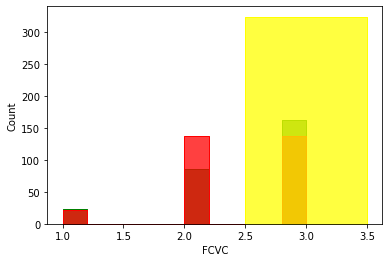

In [205]:

sns.histplot(data=Insufficient_Weight.FCVC,color= "green",element="step",discrete = False)
sns.histplot(data=Obesity_Type_II.FCVC,color= "red",element="step",discrete = False)
sns.histplot(data=Obesity_Type_III.FCVC,color= "yellow",element="step",discrete = False)


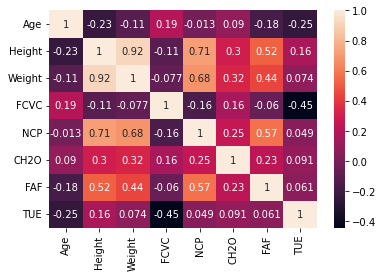

In [198]:
sns.heatmap(Insufficient_Weight.corr(), annot=True)
plt.show()

In [84]:
pd.DataFrame(Insufficient_Weight.family_history_with_overweight.value_counts())

,family_history_with_overweight
no,146
yes,126


In [82]:
Obesity_Type_II.family_history_with_overweight.value_counts()

yes    296
no       1
Name: family_history_with_overweight, dtype: int64

In [83]:
Obesity_Type_III.family_history_with_overweight.value_counts()

yes    324
Name: family_history_with_overweight, dtype: int64

In [166]:
Type_III =Obesity_Type_III.describe(include='O').iloc[2:4]
Type_II =Obesity_Type_II.describe(include='O').iloc[2:4]
Insufficient_Weight_describe = Insufficient_Weight.describe(include='O').iloc[2:4]

In [167]:
pd.concat([Type_III, Type_II,Insufficient_Weight_describe],
          axis=0,keys=["Obesity_Type_III","Obesity_Type_II","Insufficient_Weight"])

Gender family_history_with_overweight FAVC  \
Obesity_Type_III    top   Female                            yes  yes   
                    freq     323                            324  323   
Obesity_Type_II     top     Male                            yes  yes   
                    freq     295                            296  290   
Insufficient_Weight top   Female                             no  yes   
                    freq     173                            146  221   

                               CAEC SMOKE  SCC       CALC  \
Obesity_Type_III    top   Sometimes    no   no  Sometimes   
                    freq        323   323  324        323   
Obesity_Type_II     top   Sometimes    no   no  Sometimes   
                    freq        293   282  296        224   
Insufficient_Weight top   Sometimes    no   no  Sometimes   
                    freq        146   271  250        154   

                                         MTRANS           NObeyesdad  
Obesity_Type_III    top   Public_Transportation     Obesity_Type_III  
                    freq                    323                  324  
Obesity_Type_II     top   Public_Transportation      Obesity_Type_II  
                    freq                    200                  297  
Insufficient_Weight top   Public_Transportation  Insufficient_Weight  
                    freq                    220                  272

<AxesSubplot:xlabel='MTRANS', ylabel='Count'>

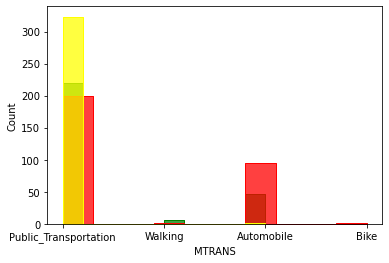

In [191]:
sns.histplot(data=Insufficient_Weight.MTRANS,color= "green",element="step",discrete = False)
sns.histplot(data=Obesity_Type_II.MTRANS,color="red",element="step",discrete = False)
sns.histplot(data=Obesity_Type_III.MTRANS,color="yellow",element="step",discrete = False)

In [168]:
Insufficient_Weight.describe().iloc[:2]

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,272.000000,272.000000,272.00000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,19.783237,1.691117,49.90633,2.514706,2.926471,1.860294,1.246324,0.841912


In [5]:
df_res = df.copy(deep=True)
df_res = pd.get_dummies(df, columns=['Gender','family_history_with_overweight','FAVC','SMOKE',
                                     'SCC','MTRANS','FCVC','NCP','CAEC','CH2O','FAF','TUE','CALC'])
df_res.head(3)

,Age,Height,Weight,NObeyesdad,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,...,FAF_1,FAF_2,FAF_3,TUE_0,TUE_1,TUE_2,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no
0,21.0,1.62,64.0,Normal_Weight,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
1,21.0,1.52,56.0,Normal_Weight,1,0,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
2,23.0,1.80,77.0,Normal_Weight,0,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0


In [6]:
df_res.drop(columns=['Weight'],inplace=True)

In [7]:
from sklearn.model_selection import train_test_split
X = df_res.drop(columns=["NObeyesdad"])
y = df_res['NObeyesdad'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

In [8]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)

##  Models:


* Random Forest
* XGBClassifier
* KNN

In [9]:
# Before we try real models, we will try a dummyClassifier. we will try to get high score than the dummyModel.
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=0)
dummy_clf.fit(X_train_norm, y_train)
dummy_clf.predict(X_train_norm)
print("The DummyClassifier score is:" ,dummy_clf.score(X_test_norm, y_test))

The DummyClassifier score is: 0.1608832807570978


In [10]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [11]:
# split the data to 10 folds
kf= KFold(n_splits=10, random_state=42, shuffle=True)

#### RandomForestClassifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state=42).fit(X_train_norm, y_train)
y_pred = RF.predict(X_test_norm)
norm_accuracy = round(metrics.accuracy_score(y_test, y_pred),3)
print("Accuracy:", norm_accuracy)

Accuracy: 0.804


In [32]:
from sklearn.ensemble import RandomForestClassifier

RForest = RandomForestClassifier(random_state=42)
random_forest= cross_val_score(RForest, X_train_norm, y_train, cv=kf, scoring='accuracy').mean()
round(random_forest,3)

0.823

##### XGBClassifier

In [34]:
from xgboost import XGBClassifier

XGBClassifier = XGBClassifier(objective="binary:logistic", random_state=42,num_class=7,eval_metric='auc')
XGB = cross_val_score(XGBClassifier, X_train_norm,y_train, cv=kf, scoring='accuracy').mean()
round(XGB,3)

0.835

In [52]:
from xgboost import XGBClassifier

XGBClassifier = XGBClassifier(objective="binary:logistic", random_state=42,num_class=7,eval_metric='auc')
XGBClassifier.fit(X_train_norm,y_train)
y_pred = XGBClassifier.predict(X_test_norm)
scores = accuracy_score(y_test,y_pred)
scores

0.8091482649842271

In [14]:
#Searching for better performance out of the models with RandomizedSearch
from sklearn.model_selection import RandomizedSearchCV

In [16]:
parameters = {'criterion':['gini','entropy'],
               'n_estimators': [int(x) for x in range(10, 400)],
               'max_depth':[int(x) for x in range(1, 20)]}
random_RF = RandomizedSearchCV(RandomForestClassifier(), parameters,verbose=True, n_jobs=-1,
                        cv=kf, random_state=42,n_iter=300,scoring='accuracy')
random_RF.fit(X_train_norm,y_train)
y_pred_RF = random_RF.predict(X_test_norm)
print(metrics.accuracy_score(y_test,y_pred_RF))
print (random_RF.best_params_)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits
0.8123028391167192
{'n_estimators': 163, 'max_depth': 19, 'criterion': 'entropy'}


In [100]:
#XGBClassifier

parameters = {
        'learning_rate': [ 0.1,0.3,0.03],
        'max_depth': [6,10,15,20],
        'min_child_weight': [1, 2],
        'subsample': [0.5,0.6,1],
        'colsample_bytree': [0.3,0.5, 0.7],
        'n_estimators' : [100,150,170,200]
         }

random_XGB = RandomizedSearchCV(XGBClassifier(eval_metric='acu'),parameters, n_jobs=-1, 
                          random_state=42, n_iter = 50, verbose = True)
random_XGB.fit(X_train_norm,y_train, eval_metric='auc')
y_pred_XGB_random = random_XGB.predict(X_test_norm)
print(metrics.accuracy_score(y_test,y_pred_XGB_random))
print (random_XGB.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
0.8138801261829653
{'subsample': 1, 'n_estimators': 150, 'min_child_weight': 1, 'max_depth': 20, 'learning_rate': 0.3, 'colsample_bytree': 0.7}
